In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_ta as ta
import yfinance as yf

from matplotlib.pyplot import figure

%matplotlib widget
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
dfs = []
# directory_path = "data/qqq-options-data-2020-2022"
directory_path = "data/spy-options-data-2020-2022"

for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)
        print(data_path)
        dfs.append(pd.read_csv(data_path, low_memory=False))

df_raw = pd.concat(dfs)
columns = df_raw.columns
columns = [s.replace("[", "") for s in columns]
columns = [s.replace("]", "") for s in columns]
columns = [s.replace(" ", "") for s in columns]
df_raw.columns = columns
df_raw

data/spy-options-data-2020-2022/spy_2020_2022.csv


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_SIZE,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005170,,1.000000,182.650000,1 x 1,181.090000,182.310000,270.0,0.000000,0.010000,0 x 2239,0.010000,-0.000240,0.000000,0.000040,-0.005090,0.000000,3.412490,3.000000,181.9,0.402
1,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005270,,,0.000000,1 x 1,176.090000,177.310000,275.0,0.000000,0.010000,0 x 2679,0.010000,-0.000630,0.000030,0.000190,-0.004800,0.000000,3.297370,0.000000,176.9,0.391
2,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005690,,25.000000,157.750000,1 x 1,171.090000,172.310000,280.0,0.000000,0.010000,0 x 2679,0.010000,0.000000,0.000000,-0.000230,-0.005340,0.000000,3.183300,11.000000,171.9,0.380
3,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005300,,25.000000,153.450000,1 x 1,166.140000,167.300000,285.0,0.000000,0.010000,0 x 2679,0.010000,-0.000160,0.000040,0.000380,-0.005320,0.000000,3.072170,50.000000,166.9,0.369
4,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005340,,25.000000,147.760000,1 x 1,161.090000,162.310000,290.0,0.000000,0.010000,0 x 2679,0.010000,-0.000680,0.000000,0.000450,-0.005150,0.000000,2.962300,0.000000,161.9,0.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589074,1614373200,2021-02-26 16:00,2021-02-26,16.0,380.36,2023-12-15,1702674000,1022.0,0.108570,0.001560,1.182900,-0.009830,0.990150,0.186590,3.000000,5.860000,2 x 2,4.000000,7.000000,570.0,196.200000,200.500000,50 x 2,0.000000,-0.974300,0.000000,0.000000,-0.009830,-15.938490,0.000340,,189.6,0.499
3589075,1614373200,2021-02-26 16:00,2021-02-26,16.0,380.36,2023-12-15,1702674000,1022.0,0.100860,0.001540,1.123300,-0.008980,0.925760,0.184770,0.000000,4.900000,1 x 5,4.220000,5.800000,575.0,200.920000,205.500000,200 x 1,0.000000,-0.973370,0.000000,0.000000,-0.009730,-16.078100,0.000000,,194.6,0.512
3589076,1614373200,2021-02-26 16:00,2021-02-26,16.0,380.36,2023-12-15,1702674000,1022.0,0.100310,0.001470,1.115060,-0.009170,0.914390,0.187930,10.000000,4.400000,2 x 10,4.000000,6.010000,580.0,205.000000,210.000000,2 x 1,0.000000,-0.973620,0.000000,0.000000,-0.009880,-16.217570,0.000410,,199.6,0.525
3589077,1614373200,2021-02-26 16:00,2021-02-26,16.0,380.36,2023-12-15,1702674000,1022.0,0.090500,0.001380,1.037350,-0.008630,0.833080,0.184190,7.000000,4.000000,1 x 1000,3.000000,5.760000,585.0,209.500000,214.500000,2 x 2,0.000000,-0.973390,0.000000,0.000000,-0.009300,-16.357500,-0.000370,,204.6,0.538


In [3]:
# df_raw.info()

In [4]:
date_columns = ["QUOTE_READTIME", "QUOTE_DATE", "EXPIRE_DATE"]
numeric_cols = df_raw.columns.to_list()
numeric_cols.remove("QUOTE_READTIME")
numeric_cols.remove("QUOTE_DATE")
numeric_cols.remove("EXPIRE_DATE")

df_numeric = df_raw.drop(columns=date_columns)

for i in numeric_cols:
    df_numeric[i] = pd.to_numeric(df_numeric[i], errors="coerce")

df_final = df_numeric.drop(columns=["C_SIZE", "P_SIZE"])
# df_final = df_final.drop(columns=date_columns)
# df_final.info()

In [5]:
# df_final.hist(column="DTE", bins=100)

### As we can see, there is a heavy skew towards shorter contracts in this dataset. 

In order to use this data for a viable trading strategy, we may want to consider truncating some longer duration contracts. The strategy proposed by https://tastytrade.com/, an options trading brokerage, recommends staying in the 45-60 day range when using the majority of trading strategies. We will explore the statistical backing behind this recommendation.

P.S. - I have no affiliation with TastyTrade, just a fan of their work and free learning materials!

In [6]:
# pd.DataFrame(df_final.DTE.value_counts()).head(20)
# df_final

In [7]:
# plt.scatter(
#     pd.to_datetime(df_numeric["QUOTE_UNIXTIME"], unit="s"), df_numeric["UNDERLYING_LAST"], color="black", alpha=0.003
# )
# plt.ylabel("Price in USD")
# plt.xlabel("Date")
# plt.title("Stock Price")

In [8]:
df_option_history = df_final.copy()

df_option_history["EXPIRE_UNIX"] = pd.to_datetime(df_option_history.EXPIRE_UNIX, unit="s", utc=True)
df_option_history["QUOTE_UNIXTIME"] = pd.to_datetime(df_option_history.QUOTE_UNIXTIME, unit="s", utc=True).apply(
    lambda x: pd.Timestamp(x).round(freq="D")
)

df_option_history.set_index(pd.DatetimeIndex(df_option_history.QUOTE_UNIXTIME), inplace=True)
df_option_history.drop(columns=["QUOTE_UNIXTIME"], inplace=True)
df_option_history.sort_index(inplace=True)

df_option_history["OPTION_ID"] = df_option_history["EXPIRE_UNIX"].astype(str) + df_option_history["STRIKE"].astype(str)
df_option_history["OPTION_ID"] = df_option_history["OPTION_ID"].apply(lambda x: hash(x))


# def get_df_cnn_fear_greed_index():
#     print("Retrieving historical ETF fear and greed index")
#     import json

#     with open("data/cnn_fear_greed_index_data.json") as f:
#         cnn_fear_greed_index_data = json.load(f)

#     df_fear_greed_index = pd.DataFrame(
#         data=cnn_fear_greed_index_data["data"]["c:50108"]["series"][0], columns=["x", "y"]
#     )
#     df_fear_greed_index.set_index(
#         pd.DatetimeIndex([pd.Timestamp(x, unit="s", tz="UTC") for x in df_fear_greed_index.x]),
#         inplace=True,
#     )
#     df_fear_greed_index.rename(columns={"y": "fear_greed_index"}, inplace=True)
#     df_fear_greed_index["fear_greed_index"] = df_fear_greed_index.fear_greed_index.astype(float).round().shift()
#     return df_fear_greed_index


# df_fear_greed_index = get_df_cnn_fear_greed_index()
# df_option_history = df_option_history.join(df_fear_greed_index, how="inner")

# df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST", "fear_greed_index"]]
# df_history.rename(columns={"UNDERLYING_LAST": "close"}, inplace=True)

# CustomStrategy = ta.Strategy(
#     name="Indicators",
#     ta=[
#         {"kind": "slope", "length": 50},
#     ],
# )
# df_history.ta.strategy(CustomStrategy)


# def get_df_product_history(product_id):
#     print(f"Retrieving historical data for {product_id}")

#     df_product_history = yf.Ticker(product_id).history(interval="1d", period="5y")

#     timestamps = [pd.to_datetime(x, utc=True).round(freq="D") for x in df_product_history.index.values]
#     timestamps_date_range = pd.date_range(start=timestamps[0], end=timestamps[-1], freq="D")
#     df_product_history = df_product_history.set_index(pd.DatetimeIndex(timestamps)).reindex(
#         timestamps_date_range, method="ffill"
#     )

#     df_product_history.ta.sma(length=50, append=True)
#     df_product_history.columns = [f"{product_id}_{x}" for x in map(str.lower, df_product_history.columns)]

#     return df_product_history


# df_vix_history = get_df_product_history("^VIX")
# df_history = df_history.join(df_vix_history)

# for column in ["close", "fear_greed_index", "SLOPE_50", "^VIX_close"]:
#     for days in [5, 7, 10, 14, 20, 30, 40, 60]:
#         periods = days
#         df_history[f"{column}_min_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).min()
#         df_history[f"{column}_max_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).max()

# df_option_history = df_option_history.join(df_history, how="inner")
# df_option_history = df_option_history.join(df_history.drop(columns=["fear_greed_index"]), how="inner")
df_option_history["index"] = df_option_history.index
df_option_history.sort_values(by=["index", "EXPIRE_UNIX", "DTE", "STRIKE_DISTANCE_PCT"], inplace=True)

df_option_history

,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,index
QUOTE_UNIXTIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03 00:00:00+00:00,16.0,324.87,2020-01-03 21:00:00+00:00,1.0,0.46284,0.29214,0.09506,-0.15799,0.00773,0.05641,NaN,0.48,0.47,0.49,325.0,0.80,0.84,0.74,-0.52563,0.20917,0.09610,-0.22168,-0.00928,0.07915,NaN,0.1,0.000,-3231336183659137318,2020-01-03 00:00:00+00:00
2020-01-03 00:00:00+00:00,16.0,324.87,2020-01-03 21:00:00+00:00,1.0,0.62396,0.32075,0.09084,-0.12946,0.01068,0.04955,NaN,0.68,0.67,0.70,324.5,0.50,0.54,0.56,-0.41390,0.22679,0.09379,-0.19352,-0.00731,0.07117,NaN,0.4,0.001,-7435068160725507626,2020-01-03 00:00:00+00:00
2020-01-03 00:00:00+00:00,16.0,324.87,2020-01-03 21:00:00+00:00,1.0,0.32101,0.26589,0.08580,-0.13484,0.00547,0.05560,NaN,0.26,0.28,0.29,325.5,0.94,1.05,1.09,-0.65328,0.23316,0.08889,-0.16479,-0.01089,0.06588,676.0,0.6,0.002,-8939227669394464856,2020-01-03 00:00:00+00:00
2020-01-03 00:00:00+00:00,16.0,324.87,2020-01-03 21:00:00+00:00,1.0,0.18370,0.21286,0.06430,-0.08262,0.00279,0.05230,NaN,0.13,0.12,0.13,326.0,1.40,1.47,1.45,-0.72860,0.17910,0.07989,-0.16572,-0.01179,0.07687,NaN,1.1,0.003,-3268750450104115645,2020-01-03 00:00:00+00:00
2020-01-03 00:00:00+00:00,16.0,324.87,2020-01-03 21:00:00+00:00,1.0,0.73688,0.23684,0.07843,-0.12113,0.01283,0.05721,NaN,1.11,1.07,1.12,324.0,0.38,0.38,0.39,-0.31862,0.19214,0.08595,-0.18553,-0.00521,0.07764,NaN,0.9,0.003,-3937119727782508354,2020-01-03 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 00:00:00+00:00,16.0,382.44,2025-12-19 21:00:00+00:00,1085.0,0.10595,0.00150,1.19348,-0.01204,1.05129,0.17770,2.0,5.71,0.59,10.00,630.0,243.00,250.50,0.00,-1.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,247.6,0.647,4959923168532465243,2022-12-31 00:00:00+00:00
2022-12-31 00:00:00+00:00,16.0,382.44,2025-12-19 21:00:00+00:00,1085.0,0.09392,0.00140,1.09723,-0.01082,0.94207,0.17304,NaN,0.00,2.00,7.00,635.0,247.66,257.50,0.00,-0.89431,0.00307,0.72687,-0.00434,-0.20330,0.29557,NaN,252.6,0.660,-6992664574334494772,2022-12-31 00:00:00+00:00
2022-12-31 00:00:00+00:00,16.0,382.44,2025-12-19 21:00:00+00:00,1085.0,0.09279,0.00137,1.08956,-0.01114,0.93199,0.17558,NaN,0.00,2.00,7.00,640.0,253.00,262.50,0.00,-0.88536,0.00298,0.78662,-0.00524,-1.78777,0.30289,NaN,257.6,0.673,5112696164936068579,2022-12-31 00:00:00+00:00


In [9]:
# for c in ["UNDERLYING_LAST", "fear_greed_index"]:
#     df = df_option_history[[c]]
#     df["date"] = df.index
#     df.drop_duplicates(subset=["date", c]).plot(x="date", y=c)

df_option_history.describe().astype(str)

,QUOTE_TIME_HOURS,UNDERLYING_LAST,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID
count,3589079.0,3589079.0,3589079.0,3588855.0,3588855.0,3588855.0,3588855.0,3588855.0,3374437.0,2868857.0,3587783.0,3587783.0,3587783.0,3589079.0,3587785.0,3587785.0,3587785.0,3588855.0,3588855.0,3588855.0,3588855.0,3588855.0,3416275.0,2843532.0,3589079.0,3589079.0,3589079.0
mean,16.0,386.7732303719144,155.3685279482561,0.5515581970990748,0.005450962493608685,0.427349205228408,-0.0600025576068133,0.4978568918192574,0.34443911443894176,236.1112000354148,31.545021672157976,49.31409368125105,50.25192269710848,367.3370336791138,30.382313006492854,31.241997335403322,15.63528415164231,-0.4360817515001299,-10.352513269009197,-9.96317242559257,-0.07844834162985137,-0.7445304386273625,0.3303822965686311,298.70856913162925,69.90646154626306,0.18220631866838244,1.7466428554568746e+16
std,0.0,56.1006933613552,202.25611102368538,0.3736930969312743,0.011324731867455536,9.962334711266005,0.07627043641341748,6.510606798573231,0.4758873649070794,3213.4436552933357,51.98400766242691,63.43096738336766,64.06312391970414,108.41681133085937,47.76958684094796,48.578653749411195,30.33331668495834,0.3769170211318753,9931.237143861246,90.96878477462086,0.5173558875714249,1.5845722639167061,0.30818370969811565,3098.9903430204913,68.46896596689133,0.1743914905060044,5.340396733870175e+18
min,16.0,222.21,0.0,0.0,-0.00012,-2815.39969,-7.16086,-2878.27141,-0.0005,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,-1.0,-14950363.96601,-2530.90001,-45.23137,-36.5688,-0.0005,0.0,0.0,0.0,-9.223191631882579e+18
25%,16.0,342.65,19.0,0.13162,0.00056,0.05089,-0.07751,0.01857,0.18142,0.0,0.02,1.81,2.15,300.0,1.43,1.51,0.04,-0.86149,0.0006,0.05567,-0.07638,-0.75759,0.19176,1.0,21.4,0.056,-4.5993706327105014e+18
50%,16.0,393.48,64.04,0.6601,0.00292,0.26219,-0.04077,0.14543,0.24271,2.0,6.9,24.02,24.88,368.0,11.38,11.98,3.16,-0.33946,0.0029,0.26713,-0.04259,-0.13945,0.26411,5.0,47.6,0.125,-5864287183018.0
75%,16.0,434.16,220.04,0.90193,0.00661,0.66888,-0.01234,0.60525,0.34442,21.0,40.97,72.97,74.43,435.0,37.04,38.43,18.19,-0.05998,0.00646,0.70626,-0.0177,-0.01009,0.37752,50.0,99.7,0.263,4.66720377148955e+18
max,16.0,477.77,1096.0,1.0,2.31232,147.32807,0.0,357.46355,54.06381,381807.0,444.2,445.41,446.28,4898.0,4451.19,4455.5,359.21,0.0,10.99989,100.68795,0.0,0.0,24.11676,297993.0,4469.3,10.425,9.223147378814607e+18


In [10]:
# df_option_history[["fear_greed_index", "fear_greed_index_max_30", "fear_greed_index_min_30"]].drop_duplicates().plot()

In [22]:
min_dte_sell = 5
min_dte_buy = int(min_dte_sell * 2)
min_volume = 100
max_strike_distance_pct = 0.2
contract_fee = 0.66
total_contracts = 1
max_loss_pct = -0
min_gain_pct = 0

money = 1000
start_money = money
last_index = df_option_history.index.values[-1]

owned_options = []
trade_data = []

for index, row in df_option_history.iterrows():
    expire_date = row.EXPIRE_UNIX.strftime(format="%Y-%m-%d")
    index_date = index.strftime(format="%Y-%m-%d")
    is_last_index = index.to_numpy() == last_index

    high_iv = 0.4
    good_call_buy = row.C_IV > high_iv
    good_put_buy = row.P_IV > high_iv

    # fear_greed_index_diff = 0
    # good_call_buy = row.fear_greed_index >= row.fear_greed_index_max_20 - fear_greed_index_diff
    # good_put_buy = row.fear_greed_index <= row.fear_greed_index_min_20 + fear_greed_index_diff

    # good_vix = row["^VIX_close"] > row["^VIX_sma_50"]
    # good_call_buy = row.fear_greed_index >= row.fear_greed_index_max_5 - fear_greed_index_diff and good_vix
    # good_put_buy = row.fear_greed_index <= row.fear_greed_index_min_5 + fear_greed_index_diff and good_vix

    call_bid_price = row.C_BID * 100
    put_bid_price = row.P_BID * 100

    owned_options_not_sold = []

    for option in owned_options:
        if option["OPTION_ID"] == row.OPTION_ID:
            call_purchase_price = option["C_ASK"] * 100
            put_purchase_price = option["P_ASK"] * 100
            call_pct_diff = (call_bid_price - call_purchase_price) / call_purchase_price
            put_pct_diff = (put_bid_price - put_purchase_price) / put_purchase_price

            if (
                option["side"] == "call"
                and not np.isnan(row.C_BID)
                and (
                    # not good_call_buy
                    row.DTE < min_dte_sell
                    or (option["DTE"] - row.DTE) > min_dte_sell
                    or call_pct_diff > min_gain_pct
                    or call_pct_diff < max_loss_pct
                    # or (call_pct_diff > min_gain_pct and not good_call_buy)
                    or is_last_index
                )
            ):
                money += (call_bid_price - contract_fee) * total_contracts
                print(
                    f"{index_date} ${money:.0f} {len(owned_options)-1} sell call {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${call_bid_price:.0f} {row.OPTION_ID}"
                )
                trade_data.append(
                    {
                        "id": row.OPTION_ID,
                        "date": index_date,
                        "money": money,
                        "side": "sell",
                        "type": "call",
                        "price": call_bid_price,
                        "options": len(owned_options) - 1,
                        "dte": option["DTE"],
                        "delta": option["C_DELTA"],
                        "gamma": option["C_GAMMA"],
                        "vega": option["C_VEGA"],
                        "theta": option["C_THETA"],
                        "rho": option["C_RHO"],
                        "iv": option["C_IV"],
                    }
                )
            elif (
                option["side"] == "put"
                and not np.isnan(row.P_BID)
                and (
                    # not good_put_buy
                    row.DTE < min_dte_sell
                    or (option["DTE"] - row.DTE) > min_dte_sell
                    or put_pct_diff > min_gain_pct
                    or put_pct_diff < max_loss_pct
                    # or (put_pct_diff > min_gain_pct and not good_put_buy)
                    or is_last_index
                )
            ):
                money += (put_bid_price - contract_fee) * total_contracts
                print(
                    f"{index_date} ${money:.0f} {len(owned_options)-1} sell put {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${put_bid_price:.0f} {row.OPTION_ID}"
                )
                trade_data.append(
                    {
                        "id": row.OPTION_ID,
                        "date": index_date,
                        "money": money,
                        "side": "sell",
                        "type": "put",
                        "price": put_bid_price,
                        "options": len(owned_options) - 1,
                        "dte": option["DTE"],
                        "delta": option["P_DELTA"],
                        "gamma": option["P_GAMMA"],
                        "vega": option["P_VEGA"],
                        "theta": option["P_THETA"],
                        "rho": option["P_RHO"],
                        "iv": option["P_IV"],
                    }
                )
            else:
                owned_options_not_sold.append(option)
        else:
            owned_options_not_sold.append(option)

    owned_options = owned_options_not_sold

    call_ask_price = row.C_ASK * 100
    put_ask_price = row.P_ASK * 100

    min_ask_price = 10

    max_buy_amount = 1
    # max_price = 100
    max_buy_price = max_price
    max_buy_price = money / total_contracts / 10
    # max_buy_price = max_buy_price if max_buy_price < max_price else max_price

    if (
        not is_last_index
        and row.DTE > min_dte_buy
        and row.STRIKE_DISTANCE_PCT <= max_strike_distance_pct
        # and money >= (call_ask_price + put_ask_price)
        # and abs(1 - (call_ask_price / put_ask_price)) < 0.5
    ):
        if (
            (
                good_call_buy
                or (len([x for x in owned_options if x["side"] == "put" and x["purchase_date"] == index_date]) > 0)
            )
            and call_ask_price > min_ask_price
            # good_call_buy
            # and (row.C_IV < 0.17 or row.C_RHO > 0.017)
            and not np.isnan(row.C_ASK)
            and row.C_VOLUME > min_volume
            and call_ask_price <= max_buy_price
            and money >= call_ask_price
            # and len([x for x in owned_options if x["OPTION_ID"] == row.OPTION_ID]) == 0
            and (
                len([x for x in owned_options if x["side"] == "call" and x["purchase_date"] == index_date])
                < max_buy_amount
            )
            and row.UNDERLYING_LAST < row.STRIKE
        ):
            money -= (call_ask_price + contract_fee) * total_contracts
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "call"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(
                f"{index_date} ${money:.0f} {len(owned_options)} buy call {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${call_ask_price:.0f} {row.OPTION_ID}"
            )
            trade_data.append(
                {
                    "id": row.OPTION_ID,
                    "date": index_date,
                    "money": money,
                    "side": "buy",
                    "type": "call",
                    "price": call_ask_price,
                    "options": len(owned_options),
                    "dte": row.DTE,
                    "delta": row.C_DELTA,
                    "gamma": row.C_GAMMA,
                    "vega": row.C_VEGA,
                    "theta": row.C_THETA,
                    "rho": row.C_RHO,
                    "iv": row.C_IV,
                }
            )
        if (
            (
                good_put_buy
                or (len([x for x in owned_options if x["side"] == "call" and x["purchase_date"] == index_date]) > 0)
            )
            and put_ask_price > min_ask_price
            # good_put_buy
            # and (row.P_IV < 0.17 or row.P_RHO > 0.017)
            and not np.isnan(row.P_ASK)
            and row.P_VOLUME > min_volume
            and put_ask_price <= max_buy_price
            and money >= put_ask_price
            # and len([x for x in owned_options if x["OPTION_ID"] == row.OPTION_ID]) == 0
            and (
                len([x for x in owned_options if x["side"] == "put" and x["purchase_date"] == index_date])
                < max_buy_amount
            )
            and row.UNDERLYING_LAST > row.STRIKE
        ):
            money -= (put_ask_price + contract_fee) * total_contracts
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "put"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(
                f"{index_date} ${money:.0f} {len(owned_options)} buy put {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${put_ask_price:.0f} {row.OPTION_ID}"
            )
            trade_data.append(
                {
                    "id": row.OPTION_ID,
                    "date": index_date,
                    "money": money,
                    "side": "buy",
                    "type": "put",
                    "price": put_ask_price,
                    "options": len(owned_options),
                    "dte": row.DTE,
                    "delta": row.P_DELTA,
                    "gamma": row.P_GAMMA,
                    "vega": row.P_VEGA,
                    "theta": row.P_THETA,
                    "rho": row.P_RHO,
                    "iv": row.P_IV,
                }
            )

print(f"Start money: ${start_money:.2f}")
print(f"End money: ${money:.2f} ({(money-start_money)/start_money*100:.2f}%)")

2020-02-25 $908 1 buy put 2020-03-06 322.42 292.0 $91 -531905910736550478
2020-02-25 $847 2 buy call 2020-03-09 322.42 336.0 $61 -4060542166094252817
2020-02-26 $1016 1 sell put 2020-03-06 312.59 292.0 $170 -531905910736550478
2020-02-26 $1029 0 sell call 2020-03-09 312.59 336.0 $14 -4060542166094252817
2020-02-26 $934 1 buy put 2020-03-09 312.59 279.0 $95 3200745782623555201
2020-02-26 $840 2 buy call 2020-03-11 312.59 329.0 $93 -5311827822059174598
2020-02-27 $901 1 sell put 2020-03-09 311.61 279.0 $62 3200745782623555201
2020-02-27 $882 2 buy put 2020-03-09 311.61 250.0 $19 4281676576973216644
2020-02-27 $951 1 sell call 2020-03-11 311.61 329.0 $70 -5311827822059174598
2020-02-27 $890 2 buy call 2020-03-11 311.61 330.0 $60 -2319543303370978518
2020-02-28 $971 1 sell put 2020-03-09 297.68 250.0 $81 4281676576973216644
2020-02-28 $888 2 buy put 2020-03-09 297.68 250.0 $82 4281676576973216644
2020-02-28 $807 3 buy call 2020-03-11 297.68 321.0 $80 -1069260108311917713
2020-02-28 $821 2 

KeyboardInterrupt: 

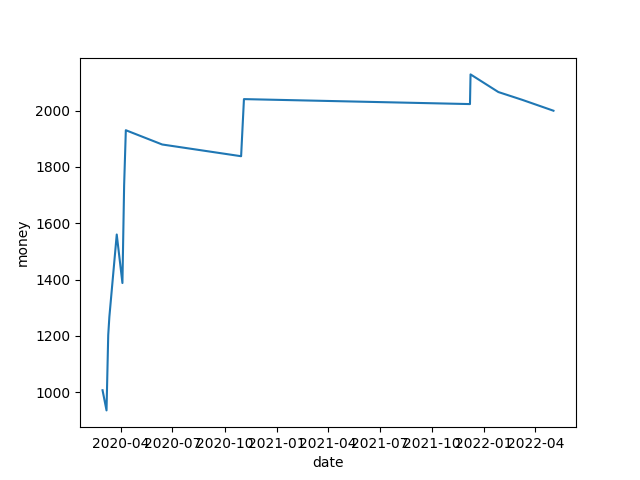

Total trades: 39
Good trades: 14 (35.90)%
Min Diff: $-62.00
Max Diff: $377.00
Min Pct. Change: -70.51%
Max Pct. Change: 589.06%


,id,money,price,options,dte,delta,gamma,vega,theta,rho,iv,diff,pct_change
count,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,41.0,41.0
mean,-9.582888725698826e+17,1592.4428205128183,82.65384615384616,1.1923076923076923,12.739487179487181,0.026150512820512832,0.006174871794871795,0.07845153846153845,-0.10565153846153845,0.003646666666666667,0.44625128205128195,26.0,27.118355304699513
std,5.290024064808114e+18,382.9192328351465,81.45890955600835,0.8226926381238482,1.524283010021005,0.07011444666331205,0.004086376397405416,0.03725624713855585,0.02991914259644307,0.00878974678161143,0.17861103491425212,102.09113575624478,137.30374399806573
min,-9.189967064413436e+18,798.4000000000003,12.0,0.0,10.04,-0.06875,0.00098,0.03033,-0.15853,-0.00707,0.14057,-62.0,-70.51282051282051
25%,-5.23548293158674e+18,1292.3299999999995,36.25,1.0,11.0,-0.041155,0.00268,0.05418,-0.12587,-0.005155,0.271235,-35.0,-59.32203389830508
50%,-2.948737385910282e+17,1716.1299999999978,65.5,1.0,12.96,0.0312,0.00466,0.06383,-0.10102,0.00444,0.60041,-14.0,-19.17808219178082
75%,3.7933745776370785e+18,1918.7449999999963,90.75,2.0,14.0,0.10023499999999999,0.009925,0.10278,-0.08662,0.0114575,0.607545,32.999999999999986,40.24390243902438
max,8.149437128110914e+18,2128.439999999996,441.0,3.0,17.0,0.11922,0.01437,0.1754,-0.03628,0.02025,0.65602,377.0,589.0625


In [17]:
df_trades = pd.DataFrame(trade_data)
# df_trades = df_trades.loc[df_trades["type"] == "call"]

df_trades["diff"] = df_trades.groupby("id")["price"].diff()
df_trades["pct_change"] = df_trades.groupby("id")["price"].pct_change() * 100

field_to_plot = "money"
# df_trades_plot = df_trades_plot.copy()
# df_trades_plot = df_trades.loc[(df_trades["side"] == "sell")]
df_trades_plot = df_trades.loc[(df_trades["side"] == "sell") & (df_trades["options"] == 0)]

# field_to_plot = "options"
# df_trades_plot = df_trades.groupby(["date"]).max("options").reset_index()

fig = figure(figsize=(13, 4), dpi=80)

plt.close(fig)
plt.clf()
plt.plot(pd.to_datetime(df_trades_plot["date"]), df_trades_plot[field_to_plot])
plt.xlabel("date")
plt.ylabel(field_to_plot)
plt.show()

total_trades = len(df_trades.loc[df_trades["side"] == "sell"])
good_trades = (df_trades.dropna()["diff"] > 0).sum()
print(f"Total trades: {total_trades}")
print(f"Good trades: {good_trades} ({good_trades/total_trades*100:.2f})%")
print(f"Min Diff: ${df_trades['diff'].min():.2f}")
print(f"Max Diff: ${df_trades['diff'].max():.2f}")
print(f"Min Pct. Change: {df_trades['pct_change'].min():.2f}%")
print(f"Max Pct. Change: {df_trades['pct_change'].max():.2f}%")
df_trades.describe().astype(str)

In [20]:
# df_trades.loc[df_trades["pct_change"] > 0].dropna().corr(numeric_only=True)

In [18]:
# df_trades.loc[df_trades["pct_change"] > 0].dropna().describe()

In [19]:
# df_trades.loc[df_trades["pct_change"] < 0].dropna().describe()